# ELASTIC_NET ON DISNEY MOVIE DATASET


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os
import regex as re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Download latest version
path = kagglehub.dataset_download("sonukumari47/disney-movie-dataset")
print("Path to dataset files:", path)
print(os.listdir('/kaggle/input/disney-movie-dataset'))
df = pd.read_csv('/kaggle/input/disney-movie-dataset/Walt_disney_movie_dataset.csv')

#shape and head
shape = df.shape
print(shape)
display(df.head())

Using Colab cache for faster access to the 'disney-movie-dataset' dataset.
Path to dataset files: /kaggle/input/disney-movie-dataset
['.nfs0000000051c8370d000000cb', 'Walt_disney_movie_dataset.csv']
(452, 35)


,Unnamed: 0,title,Production company,Release date,Running time,Country,Language,Box office,Running time (int),Budget (float),...,Screenplay by,Countries,Production companies,Color process,Japanese,Hepburn,Adaptation by,Animation by,Traditional,Simplified
0,0,Academy Award Review of,Walt Disney Productions,"['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,$45.472,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Snow White and the Seven Dwarfs,Walt Disney Productions,"['December 21, 1937 ( Carthay Circle Theatre )']",83 minutes,United States,English,$418 million,83.0,1490000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Pinocchio,Walt Disney Productions,"['February 7, 1940 ( Center Theatre )', 'Febru...",88 minutes,United States,English,$164 million,88.0,2600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fantasia,Walt Disney Productions,"['November 13, 1940']",126 minutes,United States,English,$76.4–$83.3 million (United States and Canada),126.0,2280000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,The Reluctant Dragon,Walt Disney Productions,"['June 27, 1941']",74 minutes,United States,English,"$960,000 (worldwide rentals)",74.0,600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




# General panoramic
- **Number of rows:** 452  
- **Number of columns:** 35  
- **Type of file:** CSV  
- **General description:**  
  The dataset contains information on films produced or distributed by Walt Disney. It includes details on production, distribution, cast, budget, box office, and other technical characteristics.  
---

## Columns structure

| # | Column name | Data type | None values | Description |
|---|---------------|---------------|------------------|-------------|
| 0 | `Unnamed` | int64 | 452 | Numeric index (probabily automatically generated) |
| 1 | `title` | object | 452 | Movie title |
| 2 | `Production company` | object | 190 | Main production company |
| 3 | `Release date` | object | 447 | Release date (text form) |
| 4 | `Running time` | object | 440 | Running time (es. “83 minutes”) |
| 5 | `Country` | object | 403 | Country |
| 6 | `Language` | object | 433 | Principal language |
| 7 | `Box office` | object | 372 | Box office (text form) |
| 8 | `Running time (int)` | float64 | 440 | Running time in minutes |
| 9 | `Budget (float)` | float64 | 284 | Budget in dollars (numeric value) |
| 10 | `Box office (float)` | float64 | 365 | Box office in dollars (numeric value) |
| 11 | `Release date (datetime)` | object | 442 | Release date in datetime value|
| 12 | `Directed by` | object | 451 | Director of the movie |
| 13 | `Written by` | object | 204 | Screenwriter or author |
| 14 | `Based on` | object | 235 | Original work or story from which it is taken |
| 15 | `Produced by` | object | 443 | Producter or main producters |
| 16 | `Starring` | object | 417 | Starring actors |
| 17 | `Music by` | object | 446 | Compostior |
| 18 | `Distributed by` | object | 450 | Distribution society |
| 19 | `Budget` | object | 290 | Budget in text format |
| 20 | `Story by` | object | 150 | Author of the story |
| 21 | `Narrated by` | object | 56 | Narrator |
| 22 | `Cinematography` | object | 360 | Director of photography |
| 23 | `Edited by` | object | 409 | Editor |
| 24 | `Languages` | object | 18 | Other languages ​​available |
| 25 | `Screenplay by` | object | 211 | Author of screenplay |
| 26 | `Countries` | object | 46 | Other production countries |
| 27 | `Production companies` | object | 262 | Other production companies |
| 28 | `Color process` | object | 3 | Type of color process |
| 29 | `Japanese` | float64 | 0 | Empty column |
| 30 | `Hepburn` | object | 5 | Hepburn trascription (for japanese titles) |
| 31 | `Adaptation by` | object | 1 | Author of adaptation |
| 32 | `Animation by` | object | 2 | Responsible of animation |
| 33 | `Traditional` | float64 | 0 | Empty column |
| 34 | `Simplified` | float64 | 0 | Empty column |

---



#Preprocessing

The key idea is to remove the column with a specified Nan count and devide the dataset into two:
- The first is the numerical dataset;
- The second is the categorial ones.

In [ ]:
def label_Nan(dataframe, n_NaN = 300):
  '''this function return the label with NaN_count >= n_NaN'''
  drop_label = []
  for label in dataframe:
    if dataframe[label].isna().sum() >= n_NaN:
      drop_label.append(label)

  return drop_label

#show the counter of NaN for each column
print(df.isna().sum())

#drop the column in drop_label
new_df = df.drop(columns = label_Nan(df))

#list of keys in new_df
keys = [*new_df]

new_df = new_df.drop(columns = keys[0])
new_df.shape

#now let's split the dataset in two: one categorial dataset, and the other
#numerical dataset
cat_df = new_df.select_dtypes(include = ['object'])
numeric_df = new_df.select_dtypes(include = ['int64','float64'])
display(cat_df.head(2))

#drop from the cat_df the label with a lot of NaN entries
subset = ['Release date (datetime)','Production company',
          'Production companies', 'Written by', 'Screenplay by',
          'Running time','Budget', 'Based on']
cat_df = cat_df.drop(columns = subset)
cat_df.shape

Unnamed: 0                   0
title                        0
Production company         262
Release date                 5
Running time                12
Country                     49
Language                    19
Box office                  80
Running time (int)          12
Budget (float)             168
Box office (float)          87
Release date (datetime)     10
Directed by                  1
Written by                 248
Based on                   217
Produced by                  9
Starring                    35
Music by                     6
Distributed by               2
Budget                     162
Story by                   302
Narrated by                396
Cinematography              92
Edited by                   43
Languages                  434
Screenplay by              241
Countries                  406
Production companies       190
Color process              449
Japanese                   452
Hepburn                    447
Adaptation by              451
Animatio

,title,Production company,Release date,Running time,Country,Language,Box office,Release date (datetime),Directed by,Written by,Based on,Produced by,Starring,Music by,Distributed by,Budget,Cinematography,Edited by,Screenplay by,Production companies
0,Academy Award Review of,Walt Disney Productions,"['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,$45.472,1937-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,"['December 21, 1937 ( Carthay Circle Theatre )']",83 minutes,United States,English,$418 million,1937-12-21,"['David Hand', 'William Cottrell', 'Wilfred Ja...","['Ted Sears', 'Richard Creedon', 'Otto England...","['Snow White', 'by The', 'Brothers Grimm']",Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har...","['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures,$1.49 million,NaN,NaN,NaN,NaN


(452, 12)

Let's parse the Release date in our cat dataset

In [ ]:
def extract_year(value):
    """
    Take a list and return the year as float, if not return NaN
    """

    if not value:
        return np.nan
    if isinstance(value, list):
        text = value[0]
    else:
        text = str(value)


    match = re.search(r'(\d{4})', text)
    if match:
        return float(match.group(1))
    else:
        return np.nan

#add the column year to numeric_dataset
cat_df['Release year'] = cat_df['Release date'].apply(extract_year)
numeric_df['Release year'] = cat_df['Release year']
cat_df = cat_df.drop(columns = 'Release year')

We want to normalize the entries of our dataset and handle the missing value, but in this case we have the Box office one, this is our target variable, we can make a copy of our normalized dataset for the analysis but later we're going to opt for another solution.

In [ ]:
#report of the numeric_dataset and cat_dataset:
display(numeric_df.head())
display(cat_df.head())
print('shape numeric_df: ', numeric_df.shape)
print('shape cat_df: ', cat_df.shape)

print(cat_df.isna().sum())

,Running time (int),Budget (float),Box office (float),Release year
0,41.0,NaN,4.547200e+01,1937.0
1,83.0,1490000.0,4.180000e+08,1937.0
2,88.0,2600000.0,1.640000e+08,1940.0
3,126.0,2280000.0,8.330000e+07,1940.0
4,74.0,600000.0,9.600000e+05,1941.0


,title,Release date,Country,Language,Box office,Directed by,Produced by,Starring,Music by,Distributed by,Cinematography,Edited by
0,Academy Award Review of,"['May 19, 1937']",United States,English,$45.472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,"['December 21, 1937 ( Carthay Circle Theatre )']",United States,English,$418 million,"['David Hand', 'William Cottrell', 'Wilfred Ja...",Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har...","['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures,NaN,NaN
2,Pinocchio,"['February 7, 1940 ( Center Theatre )', 'Febru...",United States,English,$164 million,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R...","['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,NaN,NaN
3,Fantasia,"['November 13, 1940']",United States,English,$76.4–$83.3 million (United States and Canada),"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']","['Leopold Stokowski', 'Deems Taylor']",See program,RKO Radio Pictures,James Wong Howe,NaN
4,The Reluctant Dragon,"['June 27, 1941']",United States,English,"$960,000 (worldwide rentals)","['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,"['Robert Benchley', 'Frances Gifford', 'Buddy ...","['Frank Churchill', 'Larry Morey']",RKO Radio Pictures,Bert Glennon,Paul Weatherwax


shape numeric_df:  (452, 4)
shape cat_df:  (452, 12)
title              0
Release date       5
Country           49
Language          19
Box office        80
Directed by        1
Produced by        9
Starring          35
Music by           6
Distributed by     2
Cinematography    92
Edited by         43
dtype: int64


In [ ]:
if 'Box office (float)' in [*numeric_df]:
  target = numeric_df['Box office (float)']

if 'Box office (float)' in [*numeric_df]:
  numeric_df = numeric_df.drop(columns = 'Box office (float)')
  eda_numeric_dataset = numeric_df.copy()

scaler = StandardScaler()
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

# first it put the median of each feature in the NaN entries for numeric_df
# and eda_cat_dataset

X_num = imputer.fit_transform(numeric_df)
eda_X_num = imputer.transform(eda_numeric_dataset)

# after, it normalize the values by z-score of each feature only for numeric_df
X_num = scaler.fit_transform(X_num)

print(X_num.shape)
print(eda_X_num.shape)
print(target.shape)

(452, 3)
(452, 3)
(452,)


We have our numerical dataset without any NaN, let's adopt a strategy for imputing and encoding our cat dataset.

In [ ]:
eda_cat_dataset = cat_df.copy()

# first let's impute the NaN entries for the cat dataset
imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 'missing')
X_cat = imputer.fit_transform(cat_df)


#encode the category with one hot encoder
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
X_cat = encoder.fit_transform(X_cat)


#now let's normalize the cat dataset, we must have a dense array to compute
#the mean and the standard deviation

scaler_cat = StandardScaler()
X_cat = scaler_cat.fit_transform(X_cat)


# Apply label encoding to optimize the dimensionality of the dataset

Let's merge X_cat with X_num for modeling, after this we can start with the part of EDA

In [ ]:
X = np.hstack([X_num, X_cat])
print(X.shape)

(452, 3040)


# EDA

We can use the two dataset that aren't normalized and encoded:
- eda_numeric_dataset;
- eda_cat_dataset.


In [ ]:
display(eda_numeric_dataset)
display(eda_cat_dataset)

,Running time (int),Budget (float),Release year
0,41.0,NaN,1937.0
1,83.0,1490000.0,1937.0
2,88.0,2600000.0,1940.0
3,126.0,2280000.0,1940.0
4,74.0,600000.0,1941.0
...,...,...,...
447,NaN,NaN,NaN
448,96.0,28000000.0,1993.0
449,NaN,NaN,NaN
450,NaN,NaN,NaN


,title,Release date,Country,Language,Box office,Directed by,Produced by,Starring,Music by,Distributed by,Cinematography,Edited by
0,Academy Award Review of,"['May 19, 1937']",United States,English,$45.472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,"['December 21, 1937 ( Carthay Circle Theatre )']",United States,English,$418 million,"['David Hand', 'William Cottrell', 'Wilfred Ja...",Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har...","['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures,NaN,NaN
2,Pinocchio,"['February 7, 1940 ( Center Theatre )', 'Febru...",United States,English,$164 million,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R...","['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,NaN,NaN
3,Fantasia,"['November 13, 1940']",United States,English,$76.4–$83.3 million (United States and Canada),"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']","['Leopold Stokowski', 'Deems Taylor']",See program,RKO Radio Pictures,James Wong Howe,NaN
4,The Reluctant Dragon,"['June 27, 1941']",United States,English,"$960,000 (worldwide rentals)","['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,"['Robert Benchley', 'Frances Gifford', 'Buddy ...","['Frank Churchill', 'Larry Morey']",RKO Radio Pictures,Bert Glennon,Paul Weatherwax
...,...,...,...,...,...,...,...,...,...,...,...,...
447,Chip 'n Dale: Rescue Rangers,NaN,United States,English,NaN,Akiva Schaffer,"['David Hoberman', 'Todd Lieberman']","['Andy Samberg', 'John Mulaney']",Brian Tyler,Walt Disney Studios Motion Pictures,Larry Fong,NaN
448,Hocus Pocus,"['July 16, 1993']",United States,English,$44.9 million,Kenny Ortega,"['David Kirschner', 'Steven Haft']","['Bette Midler', 'Sarah Jessica Parker', 'Kath...",John Debney,Buena Vista Pictures,Hiro Narita,Peter E. Berger
449,Shrunk,NaN,United States,English,NaN,Joe Johnston,"['David Hoberman', 'Todd Lieberman']","['Josh Gad', 'Rick Moranis']",NaN,"['Walt Disney Studios', 'Motion Pictures']",NaN,NaN
450,Pinocchio,NaN,United States,English,NaN,Robert Zemeckis,"['Chris Weitz', 'Andrew Milano']","['Tom Hanks', 'Benjamin Evan Ainsworth', 'Jose...",Alan Silvestri,Walt Disney Studios Motion Pictures,Don Burgess,NaN


## Let's see some information about our numeric dataset

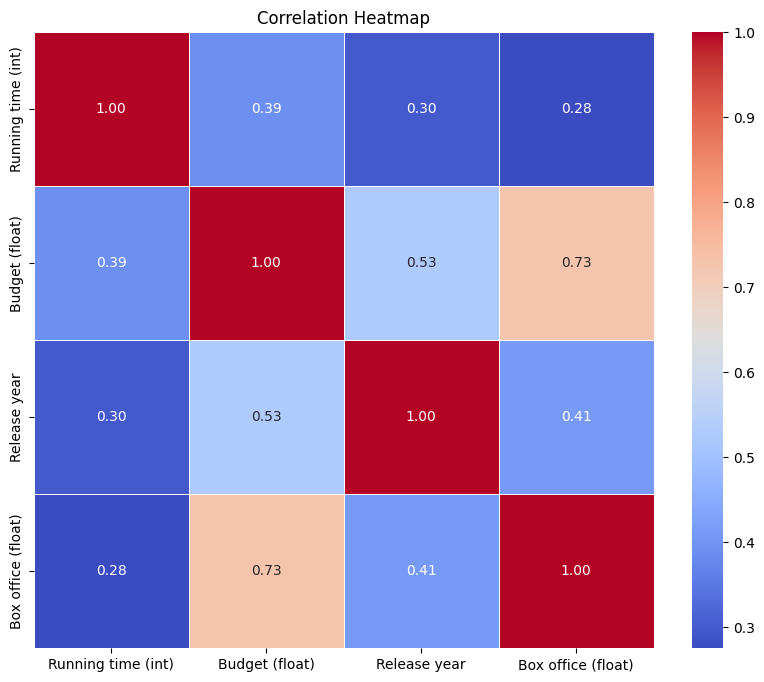

In [ ]:
# correlation matrix with visualization
corr_num_dataset = (eda_numeric_dataset).join(target)
correlation_matrix = corr_num_dataset.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

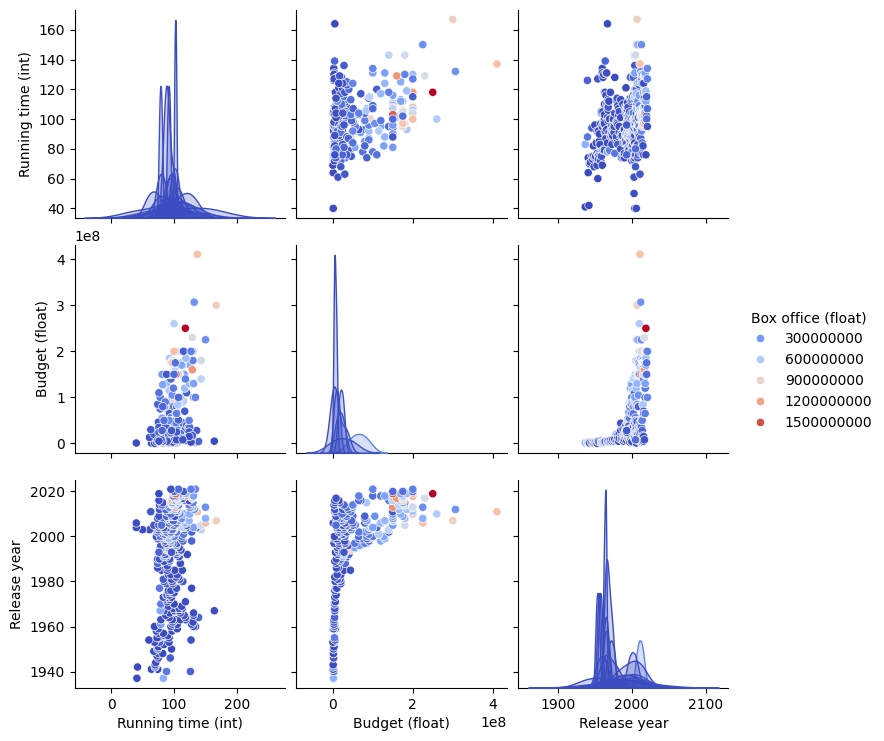

In [ ]:
# Pairplot visualization
sns.pairplot(corr_num_dataset, hue = 'Box office (float)', palette= 'coolwarm', dropna = True )
plt.show()

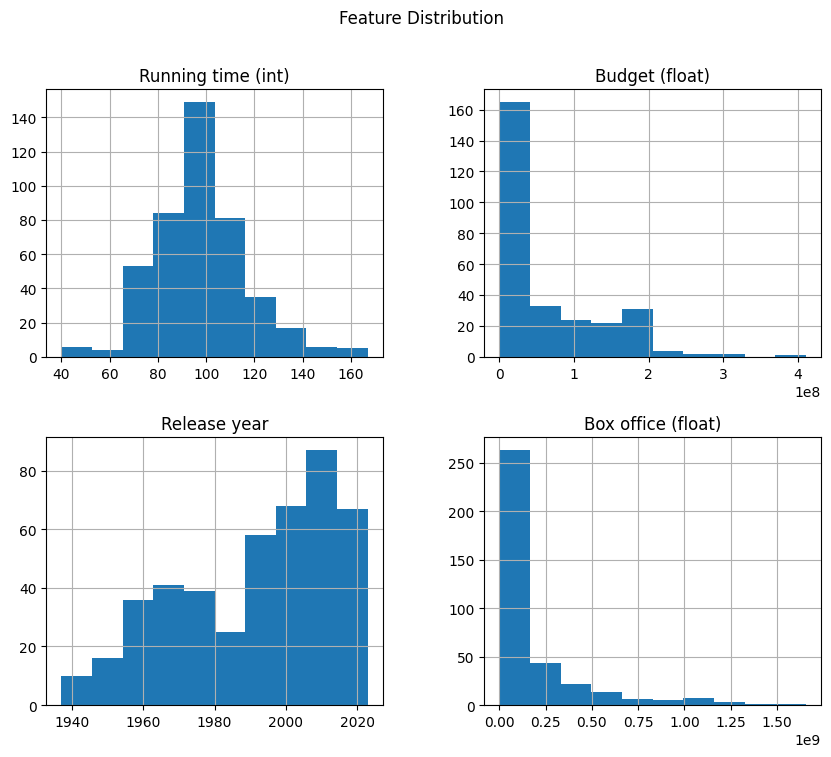

In [ ]:
# Visualization of feature distribution
corr_num_dataset.hist(figsize=(10, 8))
plt.suptitle("Feature Distribution")
plt.show()

## Let's see some other information about mixed subset of datasets

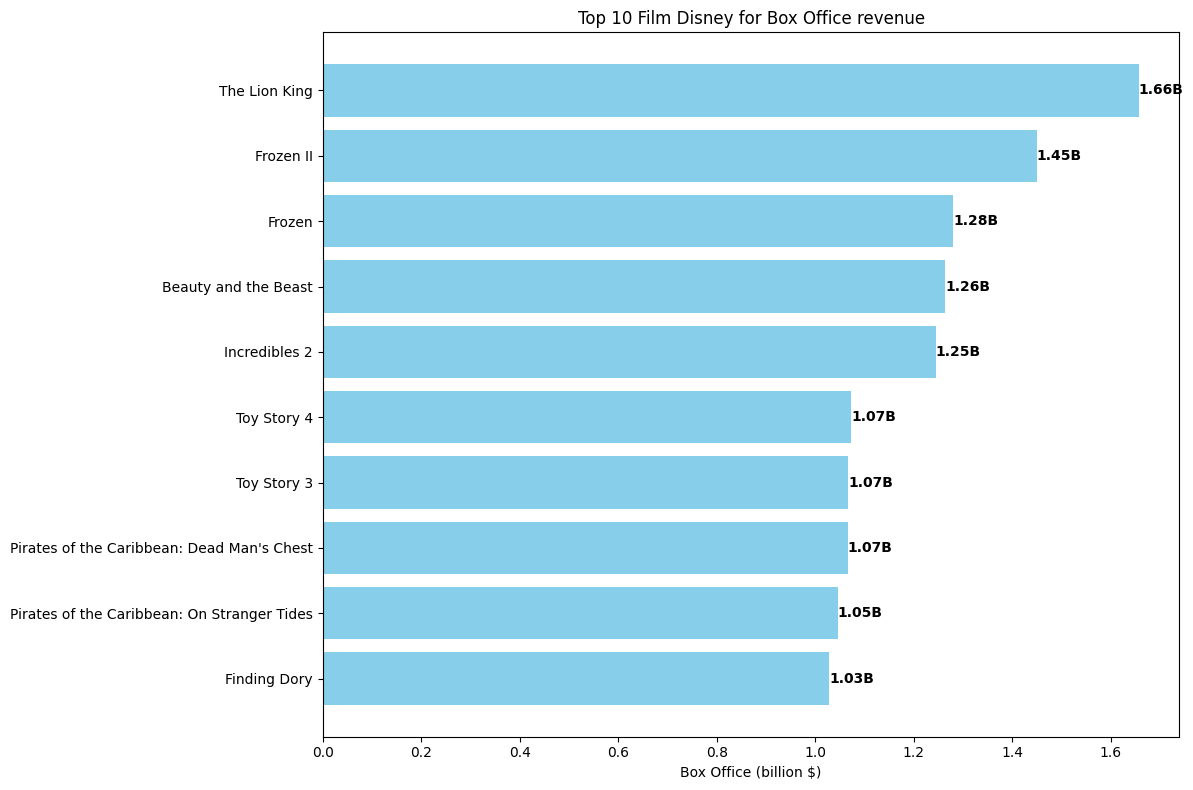

In [ ]:
top_movies = df[['title', 'Box office (float)']].dropna().sort_values('Box office (float)', ascending=False)

# Visualization for the top 10 film per box office
plt.figure(figsize=(12, 8))
top_10 = top_movies.head(10)
bars = plt.barh(top_10['title'], top_10['Box office (float)'] / 1e9, color='skyblue')
plt.xlabel('Box Office (billion $)')
plt.title('Top 10 Film Disney for Box Office revenue')
plt.gca().invert_yaxis()


for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}B',
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

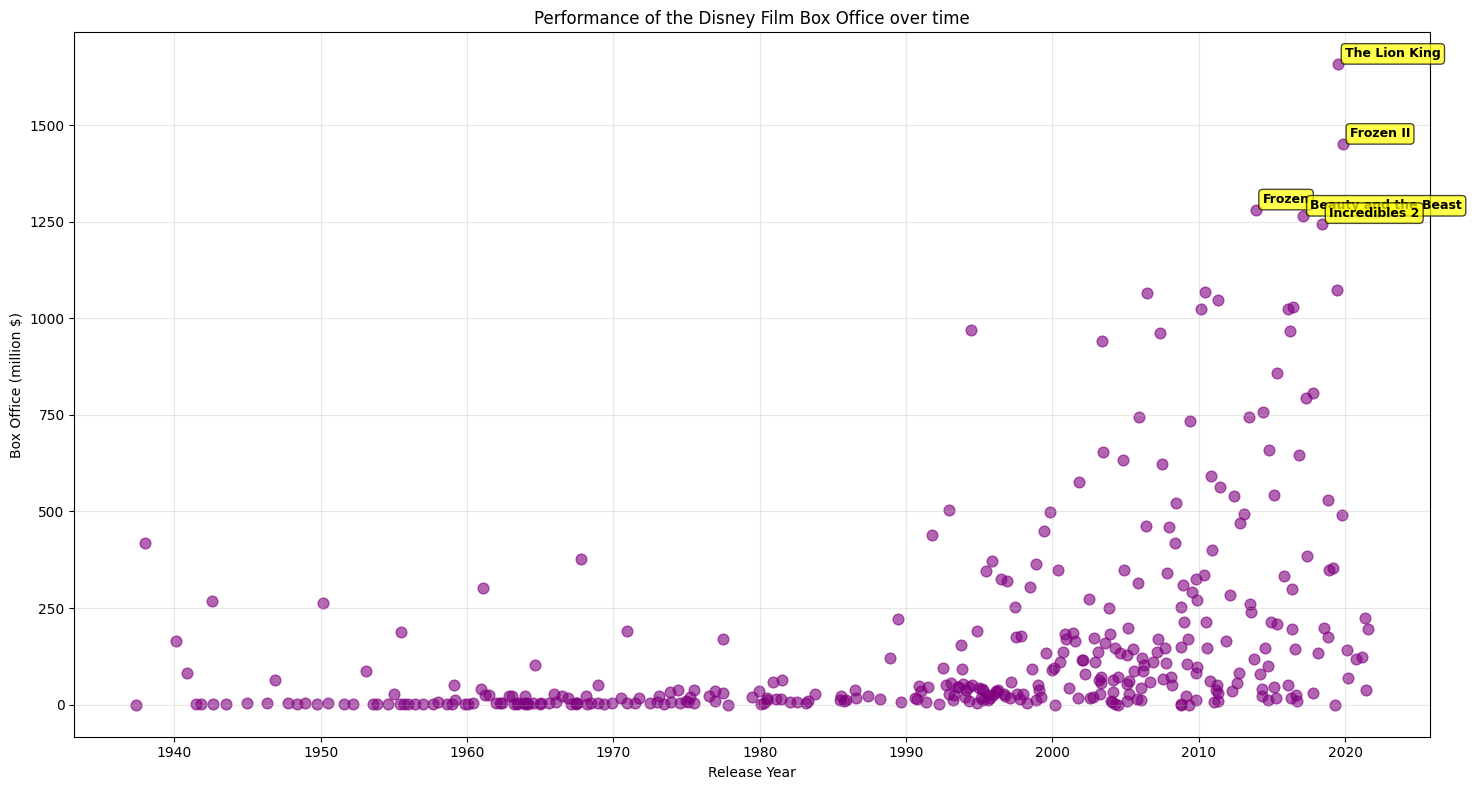

In [ ]:
# Movies over time
movies_over_time = df[['title', 'Box office (float)', 'Release date (datetime)']].dropna()

movies_over_time['Release date (datetime)'] = pd.to_datetime(movies_over_time['Release date (datetime)'])

plt.figure(figsize=(15, 8))
plt.scatter(movies_over_time['Release date (datetime)'],
            movies_over_time['Box office (float)'] / 1e6,
            alpha=0.6, s=60, color='purple')

top_5 = movies_over_time.nlargest(5, 'Box office (float)')
for idx, row in top_5.iterrows():
    plt.annotate(row['title'],
                (row['Release date (datetime)'], row['Box office (float)'] / 1e6),
                xytext=(5, 5), textcoords='offset points',
                fontweight='bold', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.xlabel('Release Year')
plt.ylabel('Box Office (million $)')
plt.title('Performance of the Disney Film Box Office over time')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#Training the model

## Now let's define four models:
- Linear regression;
- Lasso regression;
- Ridge regression;
- Elastic net regression.

And train over the training sets.

In [ ]:
# Imputation of the missing values with the median
def Cut_Nan(t):
  t_copy = t.copy()
  median = np.nanmedian(t)
  for i in range(len(t)):
    if np.isnan(t[i]):
      t_copy[i] = median
  return t_copy

target = Cut_Nan(target)

In [ ]:
#split the training set with 80% on the training set, rest over the test set
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=50)

# Linear Regression, Ridge, and Lasso models
lr_model = LinearRegression()
ridge_model = Ridge (alpha=1.0)
lasso_model = Lasso (alpha=1.0)
elastic_net_model = ElasticNet (alpha=1.0, l1_ratio=1.0)

# Train the models on the training data
lr_model.fit(X_train, y_train)
print("Linear Regression model trained.")

ridge_model.fit(X_train, y_train)
print("Ridge model trained.")

lasso_model.fit(X_train, y_train)
print("Lasso model trained.")

elastic_net_model.fit(X_train, y_train)
print("Elastic net model trained.")

Linear Regression model trained.
Ridge model trained.
Lasso model trained.
Elastic net model trained.


## Test the model over the training sets and validation sets

In [ ]:
def loss_visualization (model, X_train, y_train, X_test, y_test):

  # log of losses on the train sets and the validation sets
  train_losses = []
  val_losses = []
  train_sizes = np.linspace(0.1, 1.0, 100)
  print(f'Training set sizes: {train_sizes}')

  for size in train_sizes:
    # Sample a portion of the training set
    X_train_sample = X_train[:int(size * len(X_train))]
    y_train_sample = y_train[:int(size * len(y_train))]

    # Train the model on the subset
    model.fit(X_train_sample, y_train_sample)

    # Calculate training loss
    train_loss = mean_squared_error(y_train_sample, model.predict(X_train_sample))
    train_losses.append(train_loss)

    # Calculate validation loss
    val_loss = mean_squared_error(y_test, model.predict(X_test))
    val_losses.append(val_loss)


  plt.figure(figsize=(8, 6))
  plt.plot(train_sizes * len(X_train), train_losses, label='Training Loss (MSE)')
  plt.plot(train_sizes * len(X_train), val_losses, label='Validation Loss (MSE)')
  plt.title(f"Loss Curve:{model}")
  plt.xlabel("Training Set Size")
  plt.ylabel("MSE Loss")
  plt.legend()
  plt.show()

Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

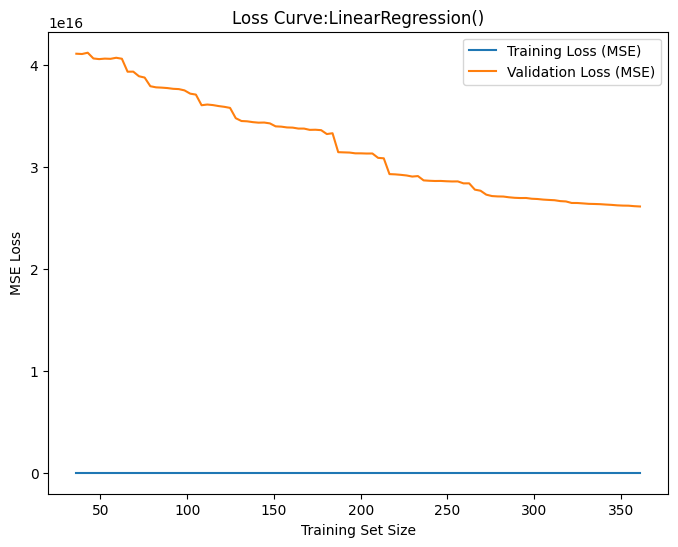

Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

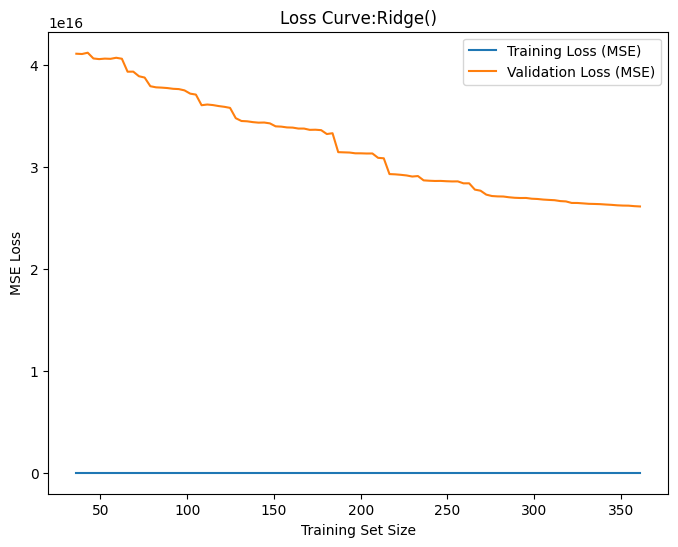

Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

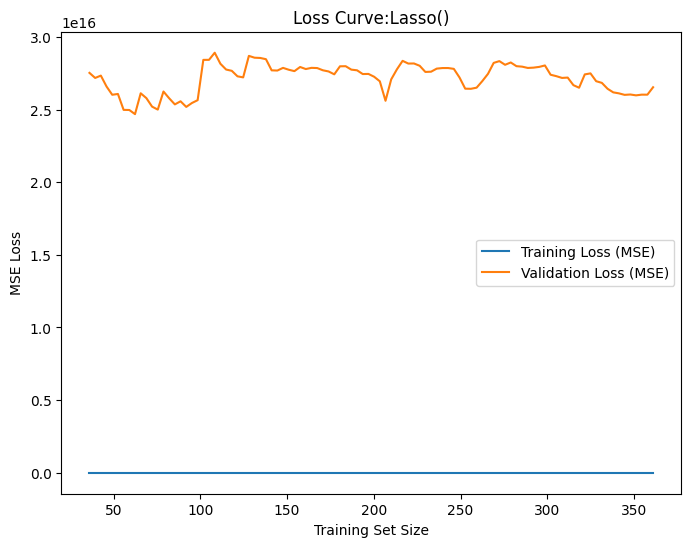

Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

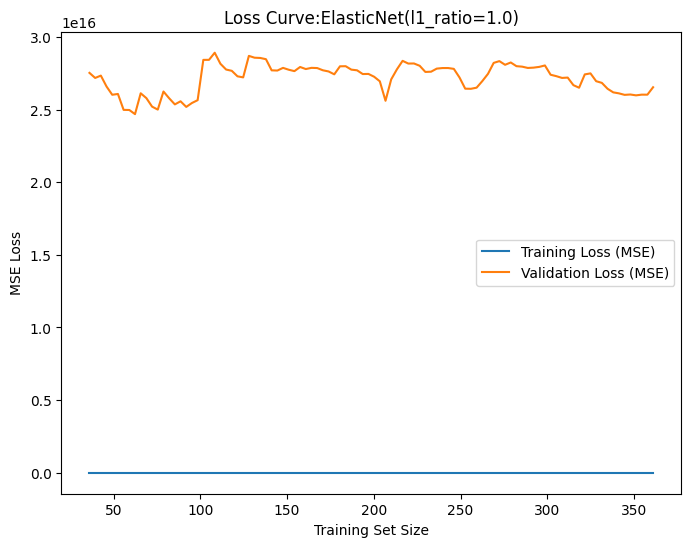

In [ ]:
loss_visualization(lr_model, X_train, y_train, X_test, y_test)
loss_visualization(ridge_model, X_train, y_train, X_test, y_test)
loss_visualization(lasso_model, X_train, y_train, X_test, y_test)
loss_visualization(elastic_net_model, X_train, y_train, X_test, y_test)


## As we can see the model is overfitted, the loss is constant over the training set with value equal to zero, but can't generalize over the validation set.
Let's try feature engineer with lasso regression:

Inizio GridSearch per Lasso...
Migliori parametri: {'alpha': np.float64(100.0)}
Miglior score (negative MSE): -32542185610338400.0000


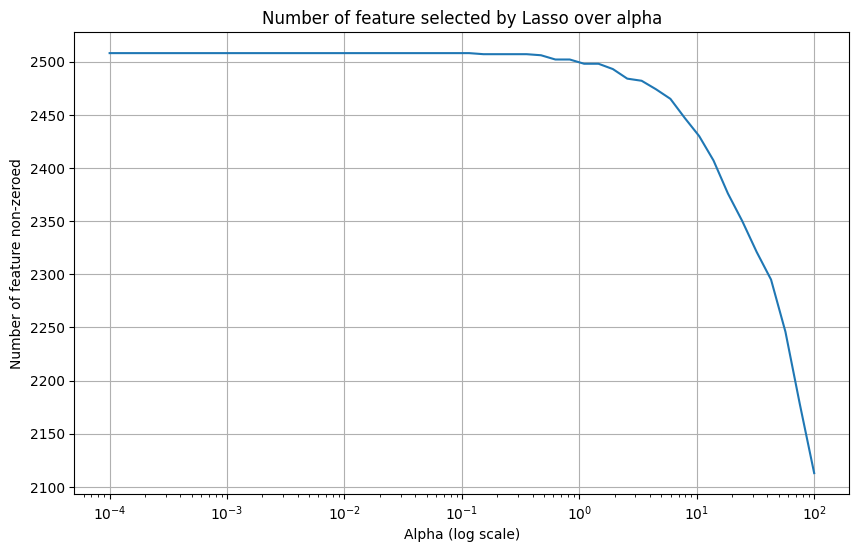


Performance on test set with best Lasso:
MSE: 26532482777275364.0000
R_2: 0.4494
Number of feature selected: 2113


In [ ]:

param_grid = {
    'alpha': np.logspace(-4, 2, 50)
}


lasso = Lasso(max_iter=10000, random_state=50)

# Setup GridSearchCV
lasso_grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross validation
    scoring='neg_mean_squared_error',  # Or 'r2' if you prefer
    n_jobs=-1,               # Uses all the available cores
    return_train_score=True   # To see the progress on train and validation
)


print("Inizio GridSearch per Lasso...")
lasso_grid.fit(X_train, y_train)


print(f"Migliori parametri: {lasso_grid.best_params_}")
print(f"Miglior score (negative MSE): {lasso_grid.best_score_:.4f}")


results = pd.DataFrame(lasso_grid.cv_results_)


non_zero_coefs = []
for alpha in param_grid['alpha']:
    lasso_temp = Lasso(alpha=alpha, max_iter=10000)
    lasso_temp.fit(X_train, y_train)
    non_zero_coefs.append(np.sum(lasso_temp.coef_ != 0))

plt.figure(figsize=(10, 6))
plt.semilogx(param_grid['alpha'], non_zero_coefs)
plt.xlabel('Alpha (log scale)')
plt.ylabel('Number of feature non-zeroed')
plt.title('Number of feature selected by Lasso over alpha')
plt.grid(True)
plt.show()


best_lasso = lasso_grid.best_estimator_

# Metrics over the test sets
y_pred = best_lasso.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"\nPerformance on test set with best Lasso:")
print(f"MSE: {test_mse:.4f}")
print(f"R_2: {test_r2:.4f}")
print(f"Number of feature selected: {np.sum(best_lasso.coef_ != 0)}")

Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

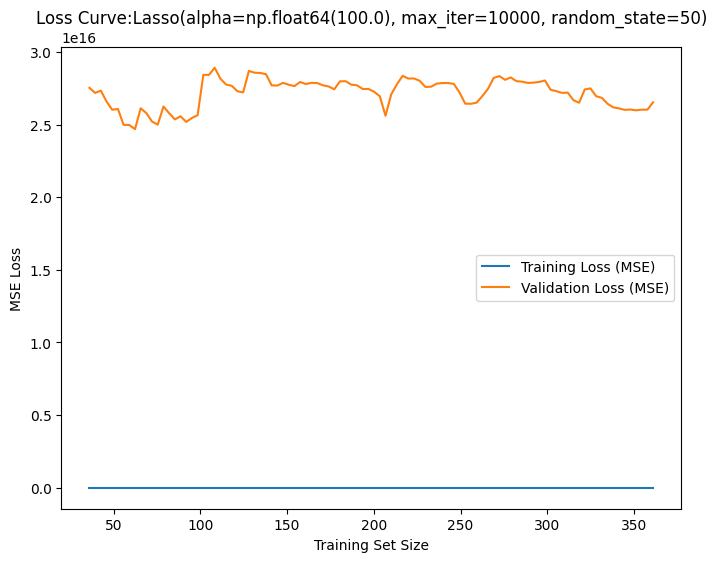

In [ ]:
loss_visualization(best_lasso, X_train, y_train, X_test, y_test)


In [ ]:
lasso_fs = Lasso(alpha=lasso_grid.best_params_['alpha'], max_iter=10000)
lasso_fs.fit(X_train, y_train)

selector = SelectFromModel(lasso_fs, prefit=True, threshold="mean")
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

print("Number of feature after SelectFromModel:", X_train_sel.shape[1])


Number of feature after SelectFromModel: 330


In [ ]:
elastic = ElasticNet(max_iter=10000, random_state=50)
param_grid_elastic = {
    'alpha': np.logspace(-4, 2, 30),
    'l1_ratio': np.linspace(0.1, 0.9, 9)
}

grid_elastic = GridSearchCV(
    estimator=elastic,
    param_grid=param_grid_elastic,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_elastic.fit(X_train_sel, y_train)
print(f"Best parameters for Elastic Net: {grid_elastic.best_params_}")
print(f"Best MSE cross-val: {grid_elastic.best_score_:.4f}")


Best parameters for Elastic Net: {'alpha': np.float64(0.011721022975334805), 'l1_ratio': np.float64(0.30000000000000004)}
Best MSE cross-val: -26756052376319032.0000


Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.474e+14, tolerance: 4.369e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+14, tolerance: 4.948e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.399e+14, tolerance: 4.982e

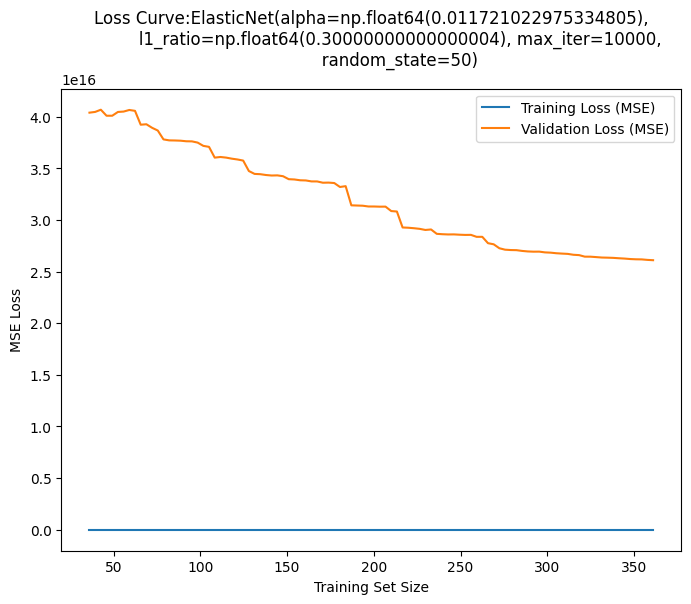

In [ ]:
loss_visualization(grid_elastic.best_estimator_,X_train, y_train, X_test, y_test)

Maybe the problem is with one-hot-encoding, the matrix feature is sparse. Let's try the training only with the numeric dataset:

In [ ]:
#The model fails to generalize due to overfitting the training data.
#Recover the numerical dataset we extracted, cleaned, and scaled.
print(X_num.shape)

X_train, X_test, y_train, y_test = train_test_split(X_num, target, test_size = 0.2, random_state = 0)

# Linear Regression, Ridge, and Lasso models
lr_model = LinearRegression()
ridge_model = Ridge (alpha=1.0)
lasso_model = Lasso (alpha=1.0)
elastic_net_model = ElasticNet (alpha=1.0, l1_ratio=0.5)

# Train the models on the training data
lr_model.fit(X_train, y_train)
print("Linear Regression model trained.")

ridge_model.fit(X_train, y_train)
print("Ridge model trained.")

lasso_model.fit(X_train, y_train)
print("Lasso model trained.")

elastic_net_model.fit(X_train, y_train)
print("Elastic net model trained.")

(452, 3)
Linear Regression model trained.
Ridge model trained.
Lasso model trained.
Elastic net model trained.


Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

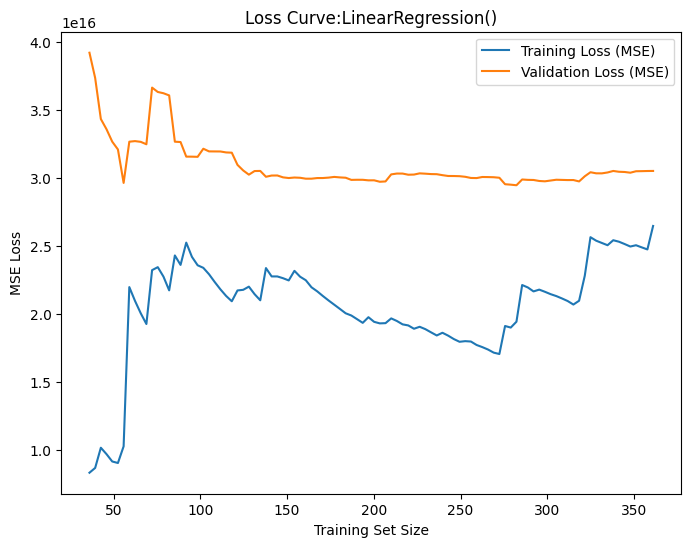

Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

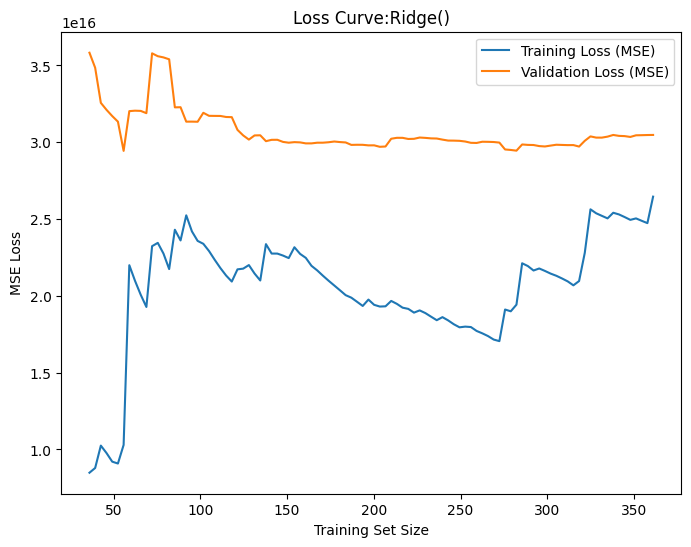

Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

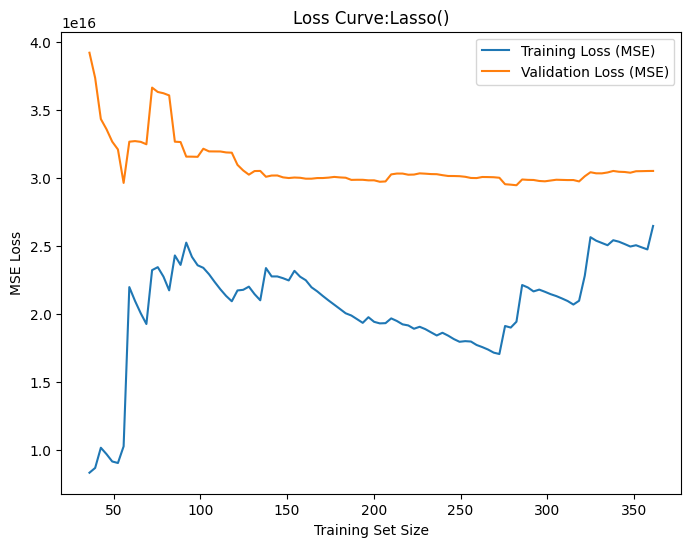

Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

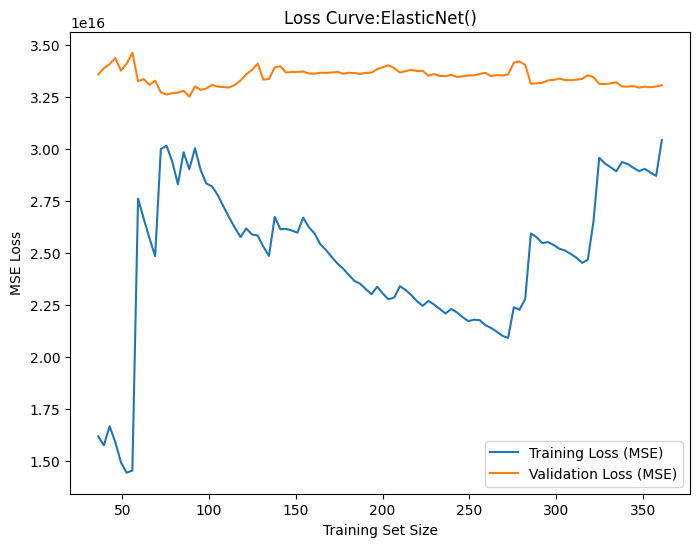

In [ ]:
loss_visualization(lr_model, X_train, y_train, X_test, y_test)
loss_visualization(ridge_model, X_train, y_train, X_test, y_test)
loss_visualization(lasso_model, X_train, y_train, X_test, y_test)
loss_visualization(elastic_net_model, X_train, y_train, X_test, y_test)

## Now some feature engineering with lasso

Starting GridSearch for Lasso...
Best parameters: {'alpha': np.float64(100.0)}
Best score (negative MSE): -27351263661026264.0000


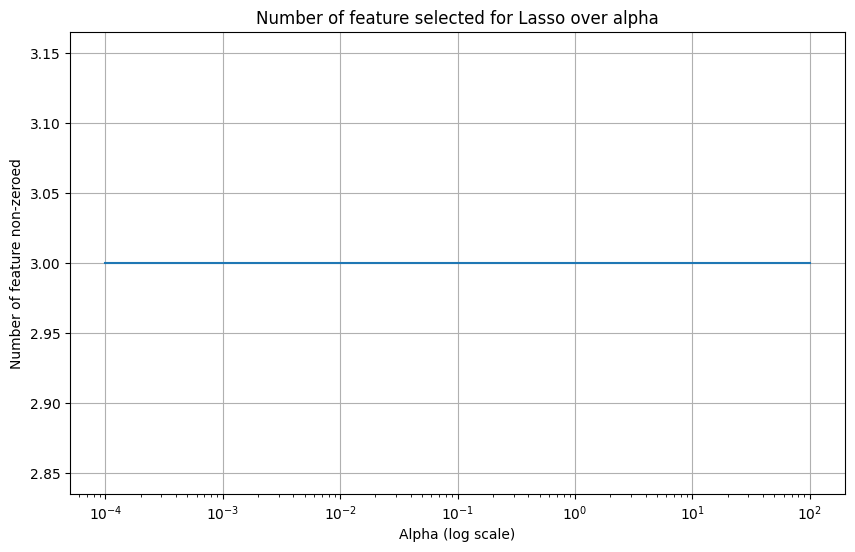


Performance sul test set con miglior Lasso:
MSE: 30496139194983864.0000
R_2: 0.5380
Number of feature selected: 3


In [ ]:

param_grid = {
    'alpha': np.logspace(-4, 2, 50)
}


lasso = Lasso(max_iter=10000, random_state=50)

# Setup GridSearchCV
lasso_grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    return_train_score=True
)


print("Starting GridSearch for Lasso...")
lasso_grid.fit(X_train, y_train)


print(f"Best parameters: {lasso_grid.best_params_}")
print(f"Best score (negative MSE): {lasso_grid.best_score_:.4f}")


results = pd.DataFrame(lasso_grid.cv_results_)

non_zero_coefs = []
for alpha in param_grid['alpha']:
    lasso_temp = Lasso(alpha=alpha, max_iter=10000)
    lasso_temp.fit(X_train, y_train)
    non_zero_coefs.append(np.sum(lasso_temp.coef_ != 0))

plt.figure(figsize=(10, 6))
plt.semilogx(param_grid['alpha'], non_zero_coefs)
plt.xlabel('Alpha (log scale)')
plt.ylabel('Number of feature non-zeroed')
plt.title('Number of feature selected for Lasso over alpha')
plt.grid(True)
plt.show()

best_lasso = lasso_grid.best_estimator_


y_pred = best_lasso.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"\nPerformance sul test set con miglior Lasso:")
print(f"MSE: {test_mse:.4f}")
print(f"R_2: {test_r2:.4f}")
print(f"Number of feature selected: {np.sum(best_lasso.coef_ != 0)}")

In [ ]:
elastic = ElasticNet(max_iter=10000, random_state=50)
param_grid_elastic = {
    'alpha': np.logspace(-4, 2, 30),
    'l1_ratio': np.linspace(0.1, 0.9, 9)
}

grid_elastic = GridSearchCV(
    estimator=elastic,
    param_grid=param_grid_elastic,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_elastic.fit(X_train, y_train)
print(f"Best parameters for Elastic Net: {grid_elastic.best_params_}")
print(f"Best MSE cross-val: {grid_elastic.best_score_:.4f}")


Best parameters for Elastic Net: {'alpha': np.float64(0.04893900918477494), 'l1_ratio': np.float64(0.4)}
Best MSE cross-val: -27309370101241800.0000


Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

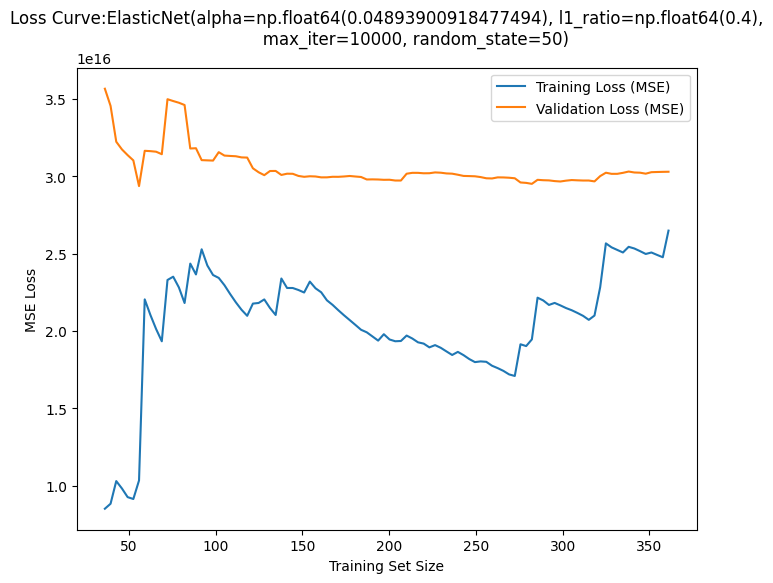

In [ ]:
loss_visualization(grid_elastic.best_estimator_,X_train, y_train, X_test, y_test)

## In this case the model trained only on the training set is underfitted.
Let's try a different approach: maybe we can use a different transformer on the categorial dataset, let's try the label ecoding:

In [ ]:

def group_rare_categories(series, min_count=5):
    """Group categories with less min_count in 'other'"""
    value_counts = series.value_counts()

    rare_categories = value_counts[value_counts < min_count].index

    series_grouped = series.copy()
    series_grouped[series_grouped.isin(rare_categories)] = 'other'
    return series_grouped


cat_df_grouped = cat_df.copy()
for col in cat_df_grouped.columns:
    cat_df_grouped[col] = group_rare_categories(cat_df_grouped[col], min_count=5)

print("Categories after grouping:")
print(cat_df_grouped.nunique())


temp_cat = cat_df_grouped.copy()
correlations = {}

for col in temp_cat.columns:
    le = LabelEncoder()
    col_encoded = le.fit_transform(temp_cat[col].fillna('missing'))
    corr = abs(np.corrcoef(col_encoded, target)[0, 1])
    correlations[col] = corr
    print(f"{col}: {corr:.4f}")


top_cat_features = sorted(correlations.items(), key=lambda x: x[1], reverse=True)[:6]
top_cat_cols = [col for col, _ in top_cat_features]
print(f"\nTop categories selected: {top_cat_cols}")

cat_df_selected = cat_df_grouped[top_cat_cols]

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing')
X_cat_filtered = imputer.fit_transform(cat_df_selected)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, max_categories=10)
X_cat_filtered = encoder.fit_transform(X_cat_filtered)

scaler_cat = StandardScaler()
X_cat_filtered = scaler_cat.fit_transform(X_cat_filtered)

print(f"Shape after OHE on selected feature: {X_cat_filtered.shape}")



X_combined = np.hstack([X_num, X_cat_filtered])
print(f"final combined Shape: {X_combined.shape}")


Categories after grouping:
title              1
Release date       1
Country            4
Language           4
Box office         1
Directed by        9
Produced by        9
Starring           1
Music by          20
Distributed by    10
Cinematography    10
Edited by         11
dtype: int64
title: nan
Release date: 0.0417
Country: 0.0155
Language: 0.1093
Box office: 0.1827
Directed by: 0.1525
Produced by: 0.0222
Starring: 0.1280
Music by: 0.1986
Distributed by: 0.2854
Cinematography: 0.0156
Edited by: 0.1599

Top categories selected: ['title', 'Distributed by', 'Music by', 'Box office', 'Edited by', 'Directed by']
Shape after OHE on selected feature: (452, 43)
final combined Shape: (452, 46)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, target, test_size=0.2, random_state=50)


lasso_fs = Lasso(alpha=0.1, max_iter=10000, random_state=50)
lasso_fs.fit(X_train, y_train)


selector = SelectFromModel(lasso_fs, prefit=True, threshold="median")
X_train_final = selector.transform(X_train)
X_test_final = selector.transform(X_test)

print(f"Features after SelectFromModel: {X_train_final.shape[1]}")



elastic = ElasticNet(max_iter=10000, random_state=50)
param_grid_elastic = {
    'alpha': np.logspace(-3, 1, 20),
    'l1_ratio': np.linspace(0.3, 0.9, 7)
}

grid_elastic = GridSearchCV(
    estimator=elastic,
    param_grid=param_grid_elastic,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_elastic.fit(X_train_final, y_train)
print(f"\nBest parameters: {grid_elastic.best_params_}")
print(f"Best MSE cross-val: {grid_elastic.best_score_:.4f}")


y_pred = grid_elastic.best_estimator_.predict(X_test_final)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"\n--- FINAL RESULTS ---")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Number of final feature: {X_train_final.shape[1]}")

#Baseline
y_mean = np.mean(y_train)
baseline_mse = mean_squared_error(y_test, [y_mean] * len(y_test))
baseline_r2 = r2_score(y_test, [y_mean] * len(y_test))

print(f"Baseline MSE (predict mean): {baseline_mse:.4f}")
print(f"Baseline R²: {baseline_r2:.4f}")
print(f"\nMSE model: {test_mse:.4f}")
print(f"R_2 model: {test_r2:.4f}")
print(f"\nImprovement: {((baseline_mse - test_mse) / baseline_mse * 100):.1f}%")




Features after SelectFromModel: 23


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.790e+17, tolerance: 2.342e+15
  model = cd_fast.enet_coordinate_descent(



Best parameters: {'alpha': np.float64(0.20691380811147903), 'l1_ratio': np.float64(0.7000000000000001)}
Best MSE cross-val: -28664007737632084.0000

--- FINAL RESULTS ---
Test MSE: 23582249795215488.0000
Test R2: 0.5106
Number of final feature: 23
Baseline MSE (predict mean): 48192515441508440.0000
Baseline R²: -0.0001

MSE model: 23582249795215488.0000
R_2 model: 0.5106

Improvement: 51.1%


Training set sizes: [0.1        0.10909091 0.11818182 0.12727273 0.13636364 0.14545455
 0.15454545 0.16363636 0.17272727 0.18181818 0.19090909 0.2
 0.20909091 0.21818182 0.22727273 0.23636364 0.24545455 0.25454545
 0.26363636 0.27272727 0.28181818 0.29090909 0.3        0.30909091
 0.31818182 0.32727273 0.33636364 0.34545455 0.35454545 0.36363636
 0.37272727 0.38181818 0.39090909 0.4        0.40909091 0.41818182
 0.42727273 0.43636364 0.44545455 0.45454545 0.46363636 0.47272727
 0.48181818 0.49090909 0.5        0.50909091 0.51818182 0.52727273
 0.53636364 0.54545455 0.55454545 0.56363636 0.57272727 0.58181818
 0.59090909 0.6        0.60909091 0.61818182 0.62727273 0.63636364
 0.64545455 0.65454545 0.66363636 0.67272727 0.68181818 0.69090909
 0.7        0.70909091 0.71818182 0.72727273 0.73636364 0.74545455
 0.75454545 0.76363636 0.77272727 0.78181818 0.79090909 0.8
 0.80909091 0.81818182 0.82727273 0.83636364 0.84545455 0.85454545
 0.86363636 0.87272727 0.88181818 0.89090909 0.9        

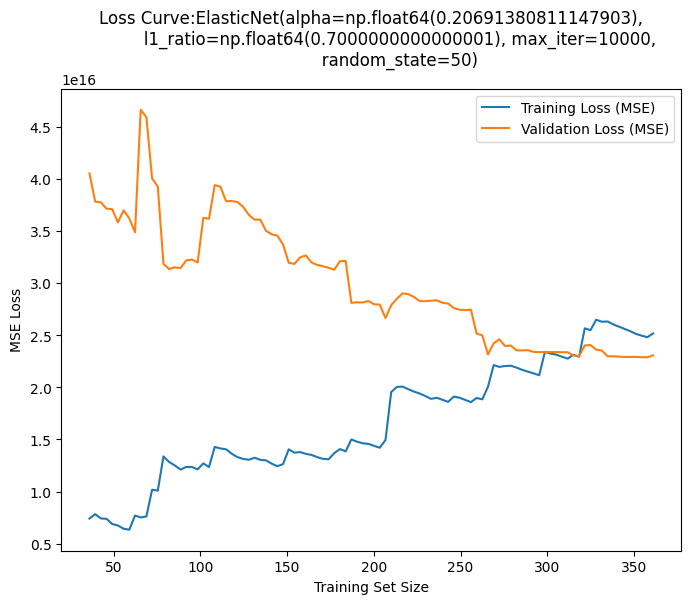

In [ ]:
loss_visualization(grid_elastic.best_estimator_, X_train, y_train, X_test, y_test)

## As we can see the model is generalizing over the validation dataset.